In [2]:
from PIL import Image as PILImage
import pandas as pd
import pytesseract
import cv2
import numpy as np
from IPython.display import Image, display


## Image original

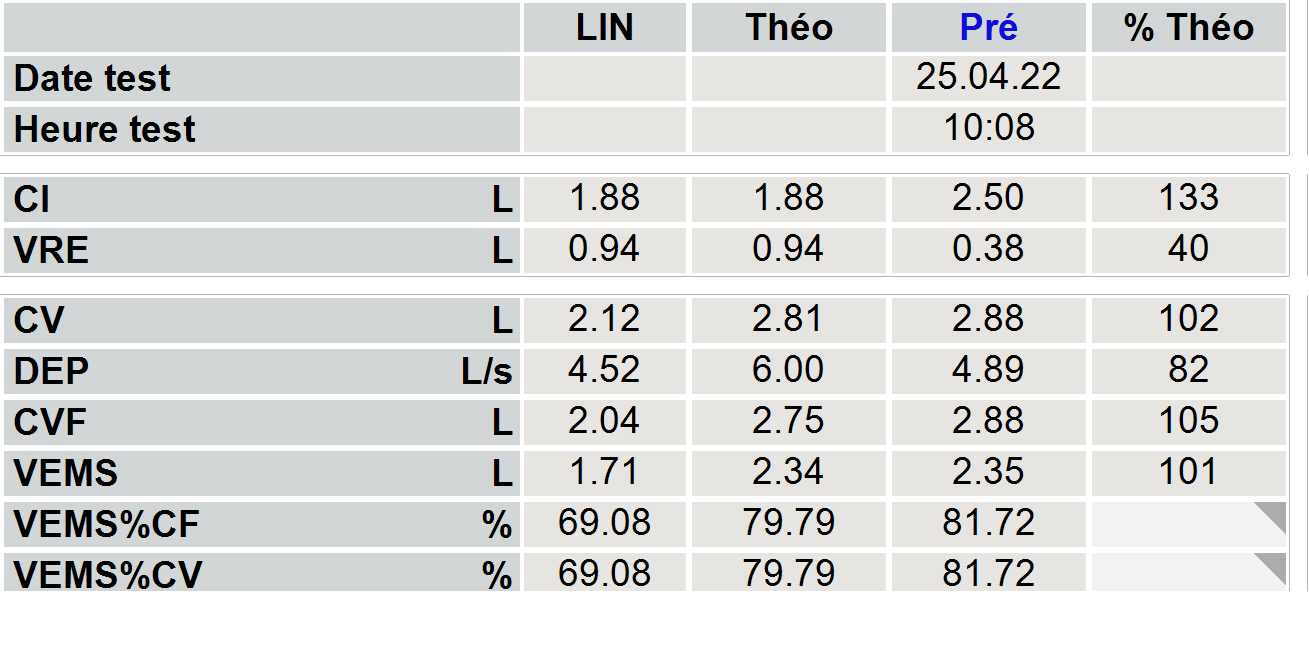

In [3]:
display(Image(filename="easily.png"))


## Pre-processing de l'image

In [4]:
import cv2
import numpy as np

image = cv2.imread('easily.png', cv2.IMREAD_GRAYSCALE)

# Binarisation
_, image = cv2.threshold(image, 170, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Amélioration du contraste avec égalisation d'histogramme
image = cv2.equalizeHist(image)

# Enregistrez l'image prétraitée pour la vérification
cv2.imwrite('preprocessed_image.png', image)


True

In [5]:
height, width = image.shape[:2]

print(f"Resolution of the image is {width}x{height} pixels.")

Resolution of the image is 1309x648 pixels.


## OCR avec tesseract basique

In [6]:
text = pytesseract.image_to_string(image)

## Processing du texte

In [7]:
# Splitting the text into sections for LIN, Basal, and % Théo
sections = text.split('\n')

In [8]:
def extract_section(sections, start_keyword=None, end_keyword=None):
    if start_keyword:
        start_idx = sections.index(start_keyword) + 1
    else:
        start_idx = 0
    
    if end_keyword:
        end_idx = sections.index(end_keyword)
    else:
        end_idx = len(sections)
    
    return [item for item in sections[start_idx:end_idx] if item]

parameters_section = extract_section(sections, None, '- Ce')
lin_values = extract_section(sections, 'LIN', 'Théo')
theo_values = extract_section(sections, 'Théo', 'Pré')
pre_values = extract_section(sections, 'Pré', '% Théo')
perc_theo_values = extract_section(sections, '% Théo')


In [9]:

# Compléter les listes pour qu'elles aient toutes la même longueur
diff_len = len(parameters_section) - len(lin_values)
for _ in range(diff_len):
    lin_values.insert(0, "")

diff_len = len(parameters_section) - len(theo_values)
for _ in range(diff_len):
    theo_values.insert(0, "")

diff_len = len(parameters_section) - len(perc_theo_values)
while diff_len > 0:
    perc_theo_values.insert(0, "")
    perc_theo_values.append("")
    
    diff_len = len(parameters_section) - len(perc_theo_values)


df = pd.DataFrame({
    'Paramètres': parameters_section,
    'Lin': lin_values,
    'Théo': theo_values,
    'Pré': pre_values,
    '% Théo': perc_theo_values
})


df

,Paramètres,Lin,Théo,Pré,% Théo
0,Date test,,,25.04.22,
1,Heure test,,,10:08,
2,Cl,1.88,1.88,2.50,133
3,VRE,0.94,0.94,0.38,40
4,CV,2.12,2.81,2.88,102
5,DEP,4.52,6.00,4.89,82
6,CVF,2.04,2.75,2.88,105
7,VEMS,1.71,2.34,2.35,101
8,VEMS%CF,69.08,79.79,81.72,
9,VEMS%CV,69.08,79.79,81.72,
